<a href="https://colab.research.google.com/github/rakesh676/ML-PROJECTS/blob/main/customer_churn_ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("/content/drive/MyDrive/ML DataSet/Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.drop(columns="customerID",inplace=True)

In [4]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data[data['TotalCharges'] == " "] = 0

In [8]:
data['TotalCharges']=data["TotalCharges"].astype(float)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
data.duplicated().sum()

np.int64(32)

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7011.000000,7011.000000,7011.000000,7011.000000
mean,0.162744,32.515761,64.879411,2290.026708
std,0.369159,24.521768,30.072611,2266.824183
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.750000,407.650000
50%,0.000000,29.000000,70.400000,1403.100000
75%,0.000000,56.000000,89.900000,3807.675000
max,1.000000,72.000000,118.750000,8684.800000


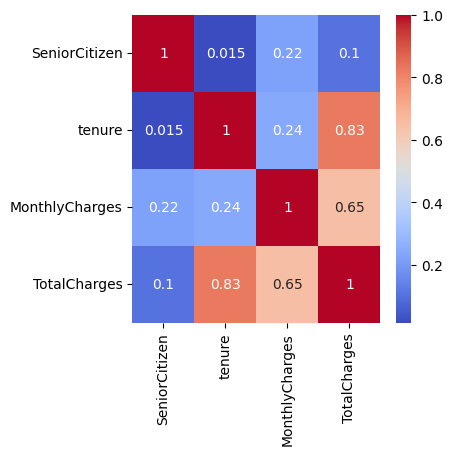

In [13]:
corr = data[["SeniorCitizen" ,"tenure" ,	"MonthlyCharges",	"TotalCharges"]].corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

In [14]:
#LE = LabelEncoder()

In [15]:
obj_columns = data.select_dtypes(["object"]).columns

In [16]:
obj_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [17]:
for i in obj_columns:
  print(data[i])

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7011, dtype: object
0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7011, dtype: object
0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7011, dtype: object
0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042    Yes
Name: PhoneService, Length: 7011, dtype: object
0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7038                 Yes
7039                 Yes
7040    No phone service
7041                 Yes
7042      

In [18]:
data.drop(index=data[data['gender'] == 0].index,inplace=True)

In [19]:
encoders = {}

for i in obj_columns:
  LE = LabelEncoder()
  print(data[i].value_counts())
  data[i] = LE.fit_transform(data[i])
  encoders[i] = LE

with open("encoders.pkl",'wb') as f:
  pickle.dump(encoders,f)

gender
Male      3535
Female    3475
Name: count, dtype: int64
Partner
No     3617
Yes    3393
Name: count, dtype: int64
Dependents
No     4911
Yes    2099
Name: count, dtype: int64
PhoneService
Yes    6330
No      680
Name: count, dtype: int64
MultipleLines
No                  3363
Yes                 2967
No phone service     680
Name: count, dtype: int64
InternetService
Fiber optic    3090
DSL            2414
No             1506
Name: count, dtype: int64
OnlineSecurity
No                     3489
Yes                    2015
No internet service    1506
Name: count, dtype: int64
OnlineBackup
No                     3079
Yes                    2425
No internet service    1506
Name: count, dtype: int64
DeviceProtection
No                     3086
Yes                    2418
No internet service    1506
Name: count, dtype: int64
TechSupport
No                     3464
Yes                    2040
No internet service    1506
Name: count, dtype: int64
StreamingTV
No                     2801
Y

In [20]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'Churn': LabelEncoder()}

In [21]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


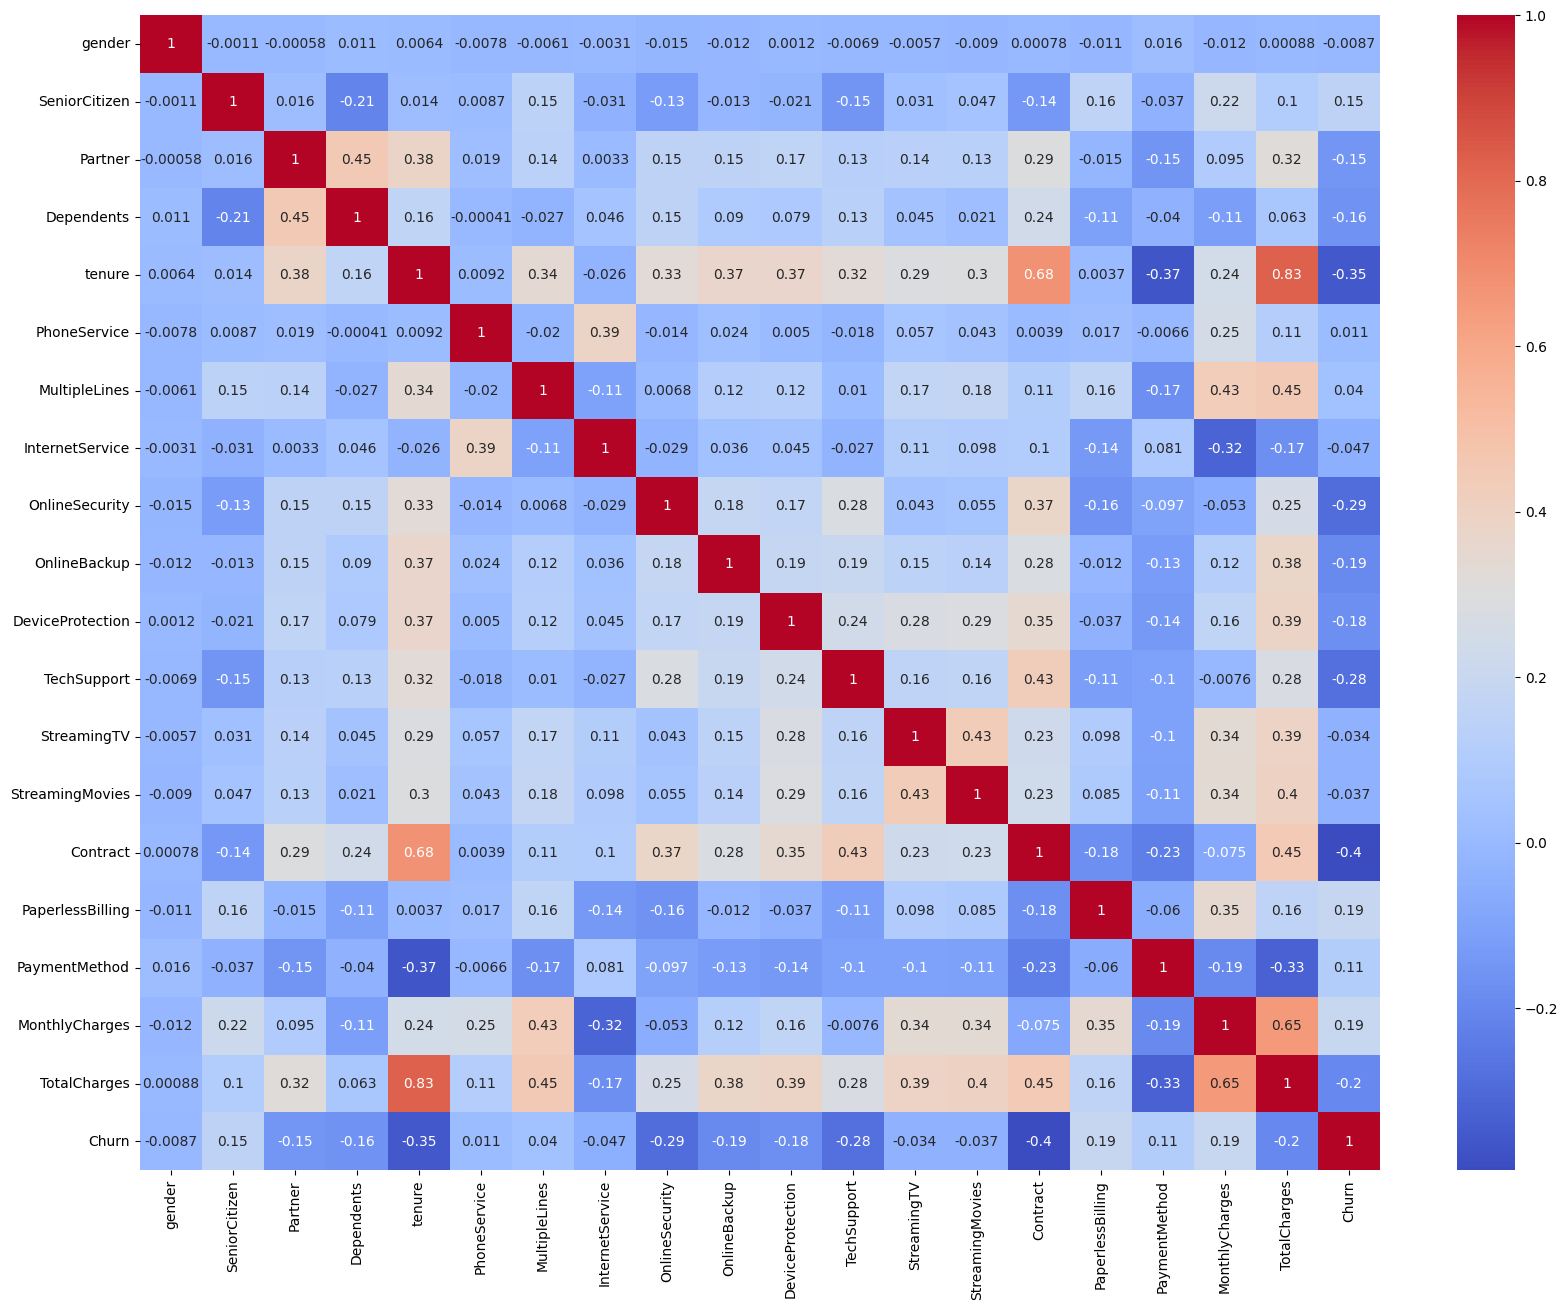

In [22]:
corr_data = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_data,annot=True,cmap="coolwarm")
plt.show()

In [23]:
data.drop(columns="TotalCharges",inplace=True)

In [24]:
x = data.drop(columns="Churn")
y = data['Churn']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=32)

In [26]:
y_train.value_counts()

,count
Churn,
0,3618
1,1289


In [27]:
smote = SMOTE(random_state=32)

In [28]:
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [29]:
y_train_smote.value_counts()

,count
Churn,
1,3618
0,3618


In [30]:
models = {
    "DecisionTree":DecisionTreeClassifier(random_state=32),
    "RandomForest":RandomForestClassifier(random_state=32),
    "SVC":SVC(random_state=32)
          }

In [31]:
scores = {}

for model_name,model in models.items():
  print(f"{model_name} is trained!")
  score = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring='accuracy')
  scores[model_name] = score
  print(f"corss val accuracy of {model_name} is {np.mean(score)}")


DecisionTree is trained!
corss val accuracy of DecisionTree is 0.7909188185119145
RandomForest is trained!
corss val accuracy of RandomForest is 0.8442633262952116
SVC is trained!
corss val accuracy of SVC is 0.7542834861229368


In [32]:
print(scores)

{'DecisionTree': array([0.70234807, 0.75673808, 0.83206634, 0.829302  , 0.8341396 ]), 'RandomForest': array([0.75483425, 0.80511403, 0.88735314, 0.87975121, 0.89426399]), 'SVC': array([0.7589779 , 0.75190048, 0.74498963, 0.7512094 , 0.76434001])}


In [33]:
random_f = RandomForestClassifier(random_state=32,max_depth=9,min_samples_split=10)

In [34]:
print(random_f.max_depth)

9


In [35]:
random_f.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=32)

In [36]:
y_test_pred = random_f.predict(x_test)
acc_test = accuracy_score(y_test,y_test_pred)
print(f"accuracy of y_test is:{acc_test}")

accuracy of y_test is:0.7717546362339515


In [37]:
y_train_pred = random_f.predict(x_train_smote)
acc_train = accuracy_score(y_train_smote,y_train_pred)
print(f"accuracy of y_train_smote:{acc_train}")

accuracy of y_train_smote:0.8663626312880044
